In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime,time
import seaborn as sns

data0 = pd.read_csv('D:\新零售\附件0.csv')
data0["支付时间"]=pd.to_datetime(data0['支付时间'],format='%Y-%m-%d',errors='coerce')
data0 = data0.set_index('支付时间')
data6 = data0['2017-06']
data6gb = data6.groupby('商品')[['销量']].sum()
pt = data6gb.sort_values('销量',ascending = False)  ##排序

还是用set_index设定索引，再通过sort_values()对销量进行升序排序，以便后续绘图。

<function matplotlib.pyplot.show(*args, **kw)>

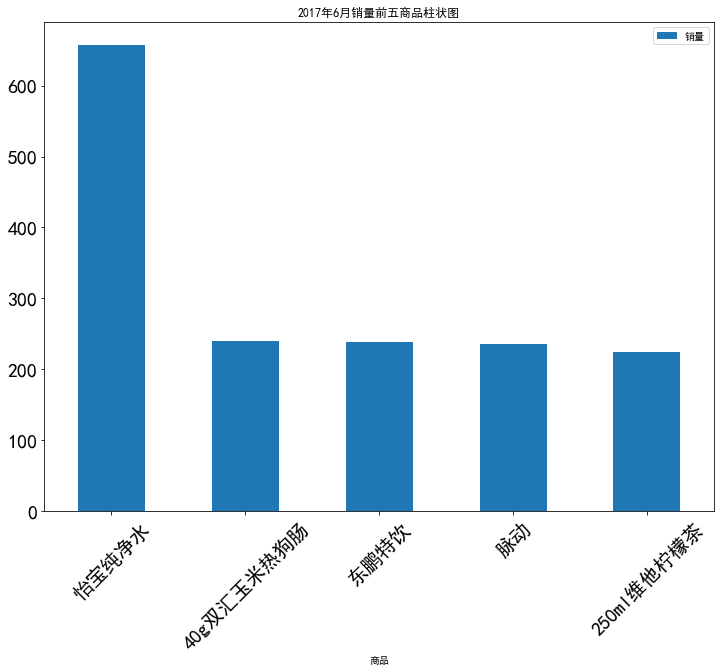

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False  ##显示中文

pt0 = pt.iloc[:5].plot(kind='bar',title='2017年6月销量前五商品柱状图',rot=45,figsize=(12,9),fontsize=20)  ##绘制前五商品柱状图
fig = pt0.get_figure()
fig.savefig('D:/新零售/fig2-1.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

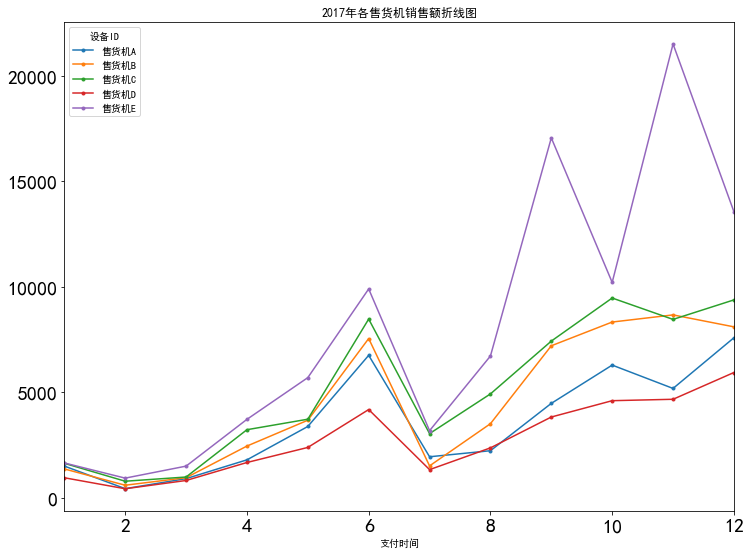

In [3]:
data00 = data0.reset_index()
data0ct = pd.crosstab(columns=data00['设备ID'],index=data00['支付时间'].apply(lambda m:m.month),values=data00['实际金额'],aggfunc=np.sum)
pt0 = data0ct.iloc[:].plot(kind='line',title='2017年各售货机销售额折线图',figsize=(12,9),fontsize=20,style='.-')
fig = pt0.get_figure()
fig.savefig('D:/新零售/fig2-2-1.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

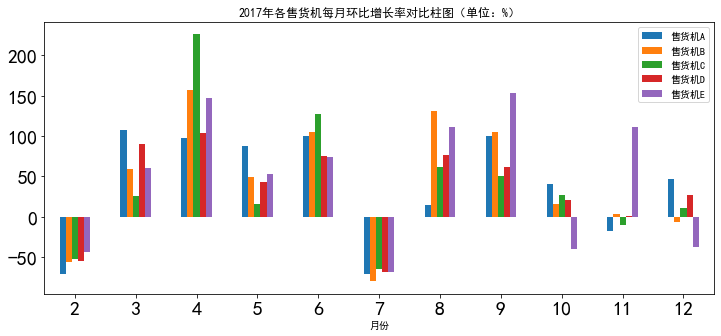

In [5]:
dataa = pd.read_csv('D:\新零售\附件0.csv')
dataa["支付时间"]=pd.to_datetime(dataa['支付时间'],format='%Y-%m-%d',errors='coerce')
dataagb = pd.crosstab(columns=dataa['设备ID'],index=dataa['支付时间'].apply(lambda m:m.month),values=dataa['实际金额'],aggfunc=np.sum)

arr1 = dataagb['售货机A']  ##提取售货机A每月销售额数据
chazhi1 = arr1.diff(periods=-1) ##diff为一阶差分函数,period=-1保证做到i与i-1的差值与i-1相除
huanbi1 = (-chazhi1/arr1)*100  ##因为用了period=-1，所以差值全部去负号


arr2 = dataagb['售货机B']
chazhi2 = arr2.diff(periods=-1)
huanbi2 = (-chazhi2/arr2)*100

arr3 = dataagb['售货机C']
chazhi3 = arr3.diff(periods=-1)
huanbi3 = (-chazhi3/arr3)*100

arr4 = dataagb['售货机D']
chazhi4 = arr4.diff(periods=-1)
huanbi4 = (-chazhi4/arr4)*100

arr5 = dataagb['售货机E']
chazhi5 = arr5.diff(periods=-1)
huanbi5 = (-chazhi5/arr5)*100

biao = {'月份':pd.date_range("2017-02-01",freq= 'M',periods=12).month,  ##月份从2开始
        '售货机A':huanbi1,
        '售货机B':huanbi2,
        '售货机C':huanbi3,
        '售货机D':huanbi4,
        '售货机E':huanbi5}
usedata = pd.DataFrame(data=biao)  ##用上面的数据生成新的dataframe
usedata.dropna(axis=0, how='any',inplace=True)  ##删除带有NaN的行
usedata = usedata.set_index('月份')  ##将月份设为新索引

usedatapt = usedata.plot(kind='bar',title='2017年各售货机每月环比增长率对比柱图（单位：%）',figsize=(12,5),fontsize=20,rot=0)  ##做柱图
fig = usedatapt.get_figure()
fig.savefig('D:/新零售/fig2-2-2.png')
plt.show

In [5]:
data1 = pd.read_csv('D:\新零售\带大类与二级类的附件0.csv')
data1ct = pd.crosstab(index=data1['设备ID'],columns=data1['大类'],values=data1['实际金额'],aggfunc=np.sum)  ##作交叉表
fenmu = [0.2,0.25]
profit = data1ct.mul(fenmu,axis=1)  ##series与dataframe作积
profit['pfsum'] = profit.apply(lambda x: x.sum(),axis=1)
profit

大类,非饮料,饮料,pfsum
设备ID,,,
售货机A,3712.26,5995.325,9707.585
售货机B,3795.02,8748.800,12543.820
售货机C,4402.64,9888.725,14291.365
售货机D,2429.94,5273.400,7703.340
售货机E,6290.48,16050.750,22341.230


利用dataframe.mul(,axis=1)计算每台售货机各大类的利润，再新添一列求和列即可

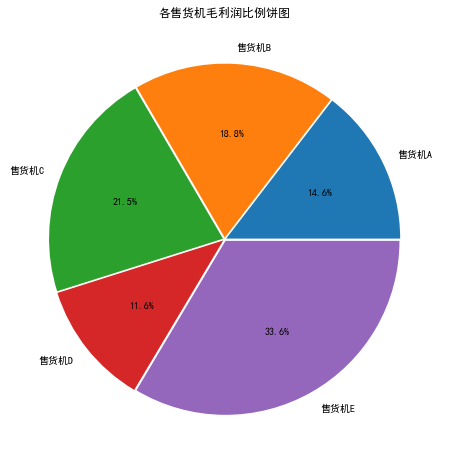

In [6]:
values = profit['pfsum']
plt.figure(figsize=(8,8))
label = ['售货机A','售货机B','售货机C','售货机D','售货机E']
plt.pie(values[:],labels=label,explode=[0.01,0.01,0.01,0.01,0.01],autopct='%1.1f%%')  ##设置离心距离
plt.title('各售货机毛利润比例饼图')
plt.savefig('D:/新零售/fig2-3.png')
plt.show()

In [7]:
data1["支付时间"] = pd.to_datetime(data1['支付时间'],format='%Y-%m-%d',errors='coerce')  ##data1依然是上个代码块的data1
old_format = data1['支付时间']
data1['支付时间'] = old_format.apply(lambda x: datetime.datetime.strftime(x,format='%Y-%m'))
  ##利用apply对整列时间数据进行strftime得到年月格式时间

data1gb = data1.groupby(['支付时间','二级类'])[['实际金额']].sum()
data1ri = data1gb.reset_index()  ##还原索引，否则后续绘图无法读取“支付时间”与“二级类”
data1ri

,支付时间,二级类,实际金额
0,2017-01,乳制品,1148.0
1,2017-01,功能饮料,718.5
2,2017-01,咖啡,169.5
3,2017-01,坚果炒货,50.0
4,2017-01,方便速食,457.0
5,2017-01,果冻/龟苓膏,5.0
6,2017-01,果蔬饮料,217.0
7,2017-01,植物蛋白,263.2
8,2017-01,水,305.2
9,2017-01,海味零食,60.9


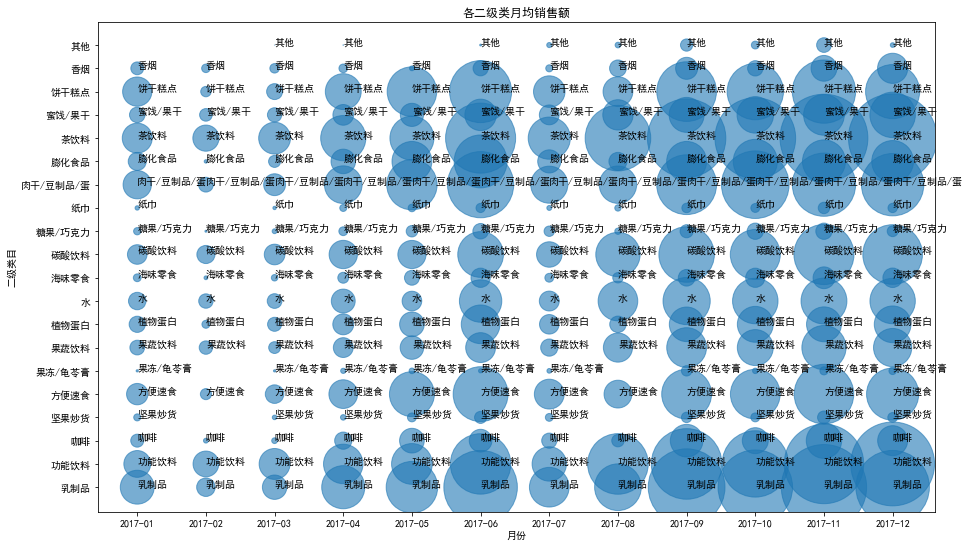

In [8]:
fig,ax=plt.subplots(figsize=(15,9))

money = data1ri["实际金额"].values
date = data1ri["支付时间"].values
classkind = data1ri["二级类"].values  ##定义各个参数

ax.scatter(date,classkind,s=money,alpha=0.6)
ax.set(xlabel="月份",
       ylabel="二级类目",
       title="各二级类月均销售额")
for i,j,z in zip(date,classkind,classkind):
    ax.text(x=i,y=j,s=z,fontsize=10)  ##利用for循环为每一个数值不为NaN的点添加文本
plt.savefig('D:/新零售/fig2-4.png')
plt.show()

In [9]:
datac = pd.read_csv('D:\新零售\任务1C.csv',encoding='gbk')

datac["支付时间"]=pd.to_datetime(datac['支付时间'],format='%Y-%m-%d',errors='coerce')
datac = datac.set_index('支付时间')  ##设置索引
datac6 = datac['2017-06']
datac7 = datac['2017-07']
datac8 = datac['2017-08']  ##按索引提取数据

datac678 = pd.concat([datac6,datac7,datac8])  ##表堆叠

usec = datac678.reset_index()

In [10]:
old_format = usec['支付时间']
day = old_format.apply(lambda x: datetime.datetime.strftime(x,format='%m-%d'))  ##将usec中的时间数据改为月日的格式

usec['日期'] = day  ##新增一列月日的日期，并命名为“日期”才会使得后续制表不会混淆
hour = old_format.apply(lambda h:h.hour)

usecct = pd.crosstab(columns=usec['日期'],index=hour,values=usec['销量'],aggfunc=np.sum)

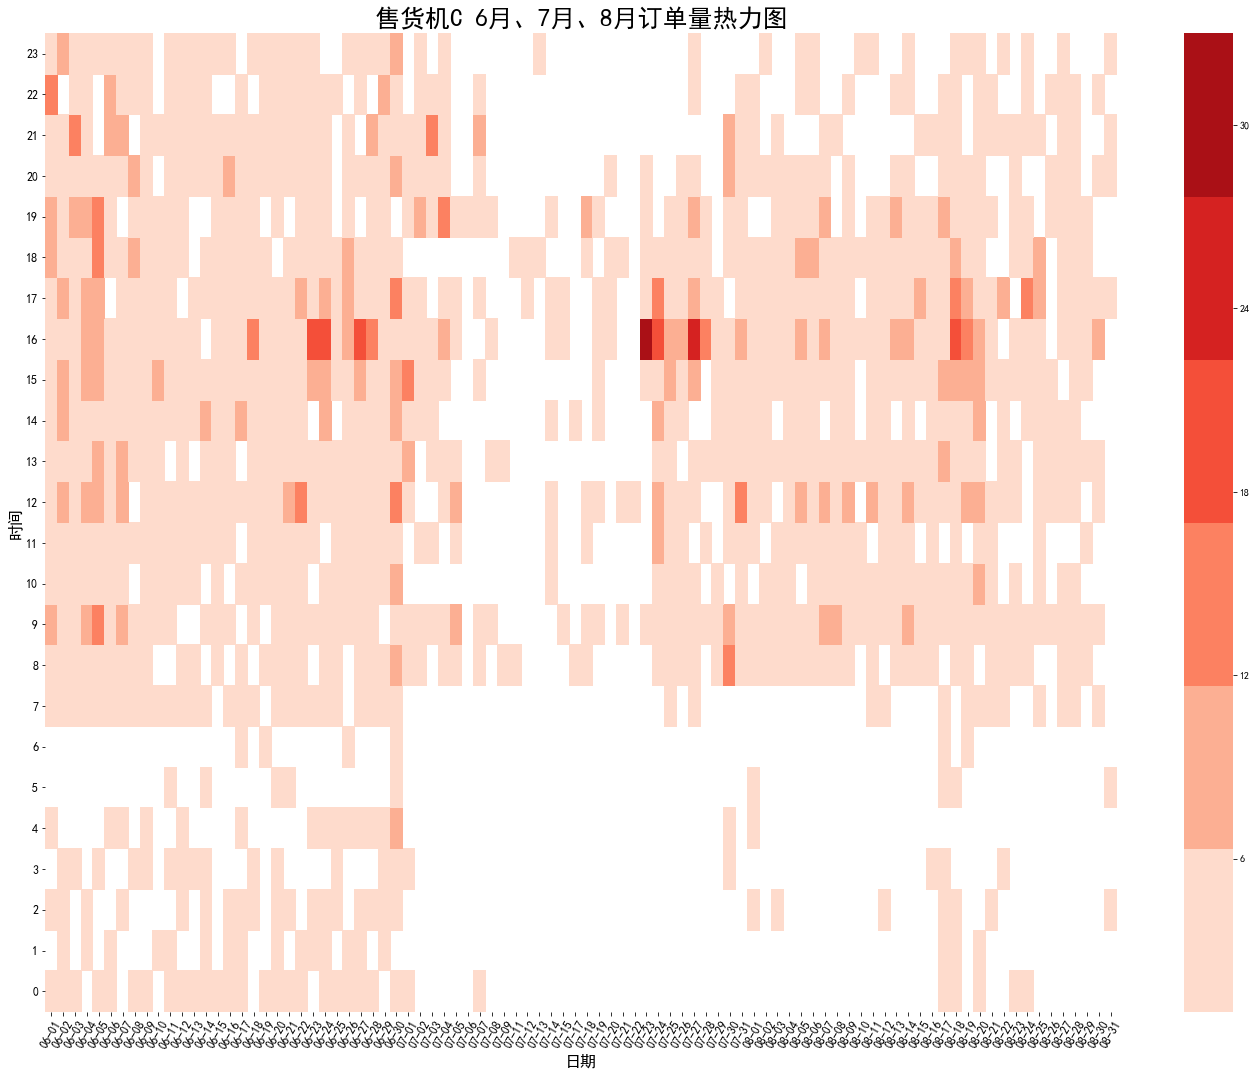

In [11]:
f,ax = plt.subplots(figsize=(24, 18))
cmap = sns.color_palette("Reds")  ##提取调色板中“红色”的颜色

sns.heatmap(usecct,linewidths = 0,cmap=cmap)  ##绘制中使用刚刚提取的“红色”，linewidths=0意味着每个色块间无线条分割

ax.set_title('售货机C 6月、7月、8月订单量热力图',fontsize=25)
ax.set_xlabel('日期',fontsize=16) 
ax.set_ylabel('时间',fontsize=16)
ax.invert_yaxis()  ##将y轴数据倒序，使得向上渐增
ax.tick_params(labelsize=12)  ##设置x，y轴刻度上的字体大小为12
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)  ##设置x轴刻度的文字旋转度为60度
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  ##设置y轴刻度的文字旋转度为0度

plt.savefig('D:/新零售/fig2-5.png')